### Installing Pytorch, torch vision and torch audio
pip install torch==1.8.1+cu111 torchvision==0.9.1+cu111 torchaudio===0.8.1 -f https://download.pytorch.org/whl/lts/1.8/torch_lts.html
### Clone the Yolo v5 model from github
git clone https://github.com/ultralytics/yolov5
### installing all the necessary dependencies to run YoloV5 model locally
cd yolov5 & pip install -r requirements.txt

# Load and test the model with some detections

In [16]:
import torch
import matplotlib.pyplot as plt
import numpy as np
import cv2

In [17]:
device = 'cuda' if torch.cuda.is_available() else "cpu"
device

'cpu'

In [18]:
model = torch.hub.load('ultralytics/yolov5','yolov5s')

Using cache found in C:\Users\trivi/.cache\torch\hub\ultralytics_yolov5_master
YOLOv5  2023-8-12 Python-3.11.4 torch-2.0.1+cpu CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients
Adding AutoShape... 


In [19]:
img = 'https://ultralytics.com/images/zidane.jpg'


##### Run the following commands if the below code cell doesn't work well
pip uninstall torch torchvision

pip install torch torchvision torchaudio --extra-index-url https://download.pytorch.org/whl/cu116


In [20]:
results = model(img)
results.print()

image 1/1: 720x1280 2 persons, 2 ties
Speed: 1823.4ms pre-process, 201.4ms inference, 1.5ms NMS per image at shape (1, 3, 384, 640)


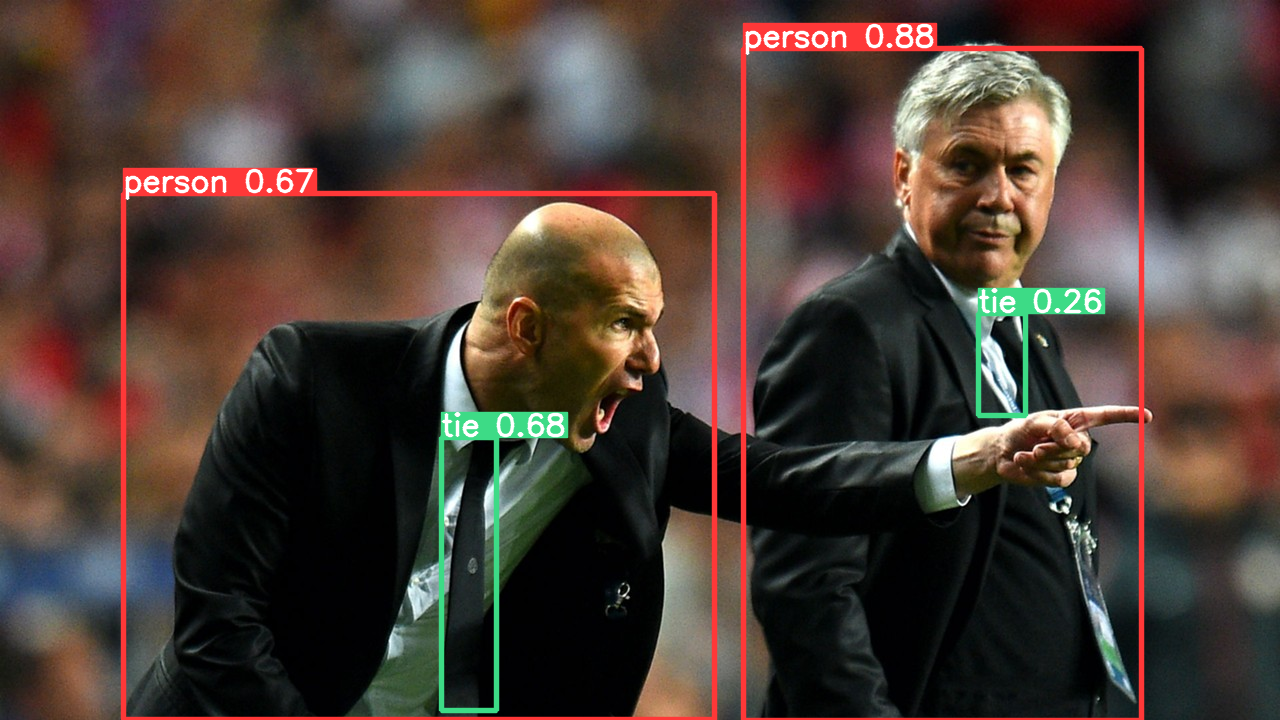

In [21]:
results.show()

In [22]:
img2 = cv2.imread("tj.jpg")
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
r2 = model(img2)
r2.print()

image 1/1: 408x616 3 persons, 26 cars, 4 buss, 2 trucks
Speed: 5.0ms pre-process, 396.1ms inference, 2.0ms NMS per image at shape (1, 3, 448, 640)


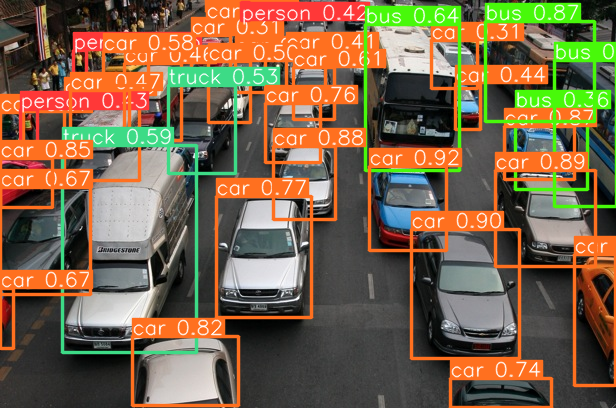

In [23]:
r2.show()

# Real time detections

In [33]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()

    results = model(frame)
    cv2.imshow('YOLO', np.squeeze(results.render()))

    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

# Collect and label data for training

In [25]:
import uuid
import os
import time

In [26]:
IMAGES_PATH = os.path.join('data', 'images') #/data/images
labels = ['awake', 'drowsy']
number_imgs = 20

In [27]:
cap = cv2.VideoCapture(0)
# Loop through labels
for label in labels:
    print('Collecting images for {}'.format(label))
    time.sleep(5)
    
    # Loop through image range
    for img_num in range(number_imgs):
        print('Collecting images for {}, image number {}'.format(label, img_num))
        
        # Webcam feed
        ret, frame = cap.read()
        
        # Naming out image path
        imgname = os.path.join(IMAGES_PATH, label+'.'+str(uuid.uuid1())+'.jpg')
        
        # Writes out image to file 
        cv2.imwrite(imgname, frame)
        
        # Render to the screen
        cv2.imshow('Image Collection', frame)
        
        # 2 second delay between captures
        time.sleep(2)
        
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
cap.release()
cv2.destroyAllWindows()

In [28]:
cap = cv2.VideoCapture(0)
names = ['awake.4a3e98c4-3905-11ee-baae-c42360c778a0.jpg','awake.50529219-3905-11ee-a3d7-c42360c778a0.jpg']
    
# Loop through image range
for name in names:
    
    # Webcam feed
    ret, frame = cap.read()
    
    
    # Writes out image to file 
    cv2.imwrite(name, frame)
    
    # Render to the screen
    cv2.imshow('Image Collection', frame)
    
    # 2 second delay between captures
    time.sleep(2)
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

#

##### For labelling run the following commands and clone the labelimg repository
git clone https://github.com/tzutalin/labelImg

pip install pyqt5 lxml --upgrade

cd labelImg && pyrcc5 -o libs/resources.py resources.qrc

##### Run this commad to train the model on the custom data
!cd yolov5 && python train.py --img 320 --batch 16 --epochs 500 --data dataset.yaml --weights yolov5s.pt --workers 2

# Testing the custom model

In [34]:
model = torch.hub.load('ultralytics/yolov5','custom',path='yolov5/runs/train/exp/weights/last.pt', force_reload=True)

Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to C:\Users\trivi/.cache\torch\hub\master.zip
YOLOv5  2023-8-12 Python-3.11.4 torch-2.0.1+cpu CPU

Fusing layers... 
Model summary: 157 layers, 7055974 parameters, 0 gradients, 15.9 GFLOPs
Adding AutoShape... 


In [35]:
img = os.path.join('data', 'images', 'awake.3f413514-3905-11ee-aa9e-c42360c778a0.jpg')
results = model(img)

In [36]:
results.print()

image 1/1: 480x640 1 awake
Speed: 5.0ms pre-process, 118.7ms inference, 0.0ms NMS per image at shape (1, 3, 480, 640)


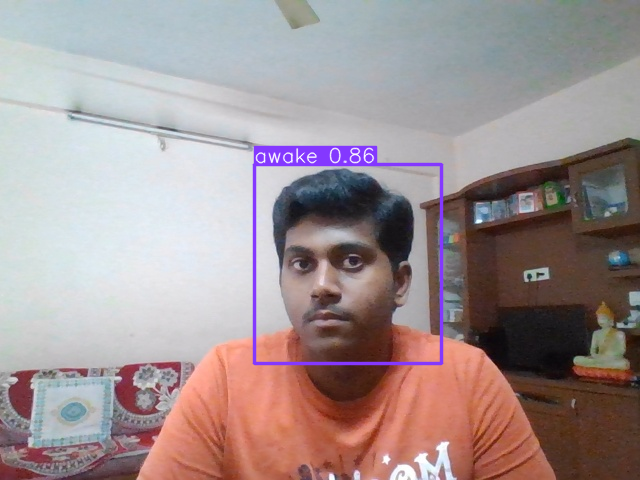

In [37]:
results.show()

In [38]:
img = os.path.join('data', 'images', 'drowsy.60b6065e-3905-11ee-bae7-c42360c778a0.jpg')
results = model(img)

In [39]:
results.print()

image 1/1: 480x640 1 drowsy
Speed: 5.5ms pre-process, 118.3ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)


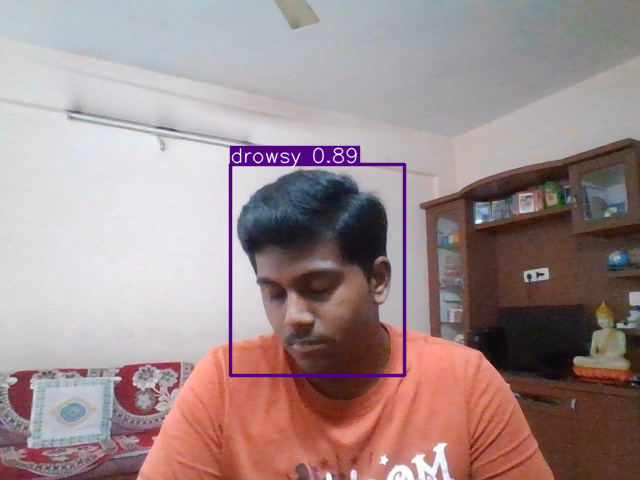

In [40]:
results.show()